## Analyzing Multiple Data Sets

We have created a function called `analyze` that creates graphs of the minimum, average, and maximum daily inflammation rates
for a single data set:

In [1]:
%matplotlib inline

import numpy as np
from matplotlib import pyplot as plt

def analyze(filename):
    data = np.loadtxt(fname=filename, delimiter=',')
    
    plt.figure(figsize=(10.0, 3.0))
    
    plt.subplot(1, 3, 1)
    plt.ylabel('average')
    plt.plot(data.mean(0))
    
    plt.subplot(1, 3, 2)
    plt.ylabel('max')
    plt.plot(data.max(0))
    
    plt.subplot(1, 3, 3)
    plt.ylabel('min')
    plt.plot(data.min(0))
    
    plt.tight_layout()
    plt.show()

analyze('inflammation-01.csv')

ImportError: /usr/local/anaconda/envs/swc/lib/python2.7/lib-dynload/_csv.so: failed to map segment from shared object: Cannot allocate memory

We can use it to analyze other data sets one by one:

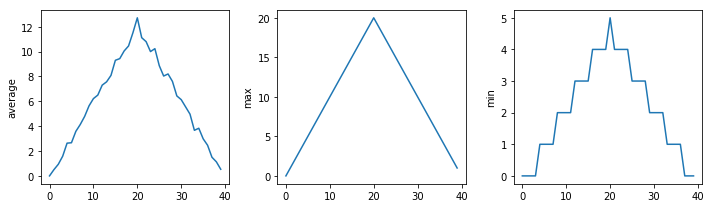

In [6]:
analyze('inflammation-02.csv')

but we have a dozen data sets right now and more on the way.
We want to create plots for all our data sets with a single statement.
To do that,
we'll have to teach the computer how to repeat things.

#### Objectives

*   Explain what a for loop does.
*   Correctly write for loops to repeat simple calculations.
*   Trace changes to a loop variable as the loop runs.
*   Trace changes to other variables as they are updated by a for loop.
*   Explain what a list is.
*   Create and index lists of simple values.
*   Use a library function to get a list of filenames that match a simple wildcard pattern.
*   Use a for loop to process multiple files.

### For Loops

Suppose we want to print each character in the word "lead" on a line of its own.
One way is to use four `print` statements:

In [7]:
def print_characters(element):
    print element[0]
    print element[1]
    print element[2]
    print element[3]

print_characters('lead')

l
e
a
d


but that's a bad approach for two reasons:

1.  It doesn't scale:
    if we want to print the characters in a string that's hundreds of letters long,
    we'd be better off just typing them in.

1.  It's fragile:
    if we give it a longer string,
    it only prints part of the data,
    and if we give it a shorter one,
    it produces an error because we're asking for characters that don't exist.

In [8]:
print_characters('tin')

t
i
n


IndexError: string index out of range

Here's a better approach:

In [9]:
def print_characters(element):
    for char in element:
        print char

print_characters('lead')

l
e
a
d


This is shorter---certainly shorter than something that prints every character in a hundred-letter string---and
more robust as well:

In [10]:
print_characters('oxygen')

o
x
y
g
e
n


The improved version of `print_characters` uses a [for loop](gloss.html#for-loop)
to repeat an operation---in this case, printing---once for each thing in a collection.
The general form of a loop is:

<pre>
<strong>for</strong> <em>variable</em> <strong>in</strong> <em>collection</em><strong>:</strong>
    <em>do things with variable</em>
</pre>

We can call the [loop variable](gloss.html#loop-variable) anything we like,
but there must be a colon at the end of the line starting the loop,
and we must indent the body of the loop.

Here's another loop that repeatedly updates a variable:

In [11]:
length = 0
for vowel in 'aeiou':
    length = length + 1
print 'There are', length, 'vowels'

There are 5 vowels


It's worth tracing the execution of this little program step by step.
Since there are five characters in `'aeiou'`,
the statement on line 3 will be executed five times.
The first time around,
`length` is zero (the value assigned to it on line 1)
and `vowel` is `'a'`.
The statement adds 1 to the old value of `length`,
producing 1,
and updates `length` to refer to that new value.
The next time around,
`vowel` is `'e'` and `length` is 1,
so `length` is updated to be 2.
After three more updates,
`length` is 5;
since there is nothing left in `'aeiou'` for Python to process,
the loop finishes
and the `print` statement on line 4 tells us our final answer.

Note that a loop variable is just a variable that's being used to record progress in a loop.
It still exists after the loop is over,
and we can re-use variables previously defined as loop variables as well:

In [12]:
letter = 'z'
for letter in 'abc':
    print letter
print 'after the loop, letter is', letter

a
b
c
after the loop, letter is c


Note also that finding the length of a string is such a common operation
that Python actually has a built-in function to do it called `len`:

In [13]:
print len('aeiou')

5


`len` is much faster than any function we could write ourselves,
and much easier to read than a two-line loop;
it will also give us the length of many other things that we haven't met yet,
so we should always use it when we can.

#### Challenges

1.  Python has a built-in function called `range` that creates a list of numbers:
    `range(3)` produces `[0, 1, 2]`, `range(2, 5)` produces `[2, 3, 4]`, and `range(2, 10, 3)` produces `[2, 5, 8]`.
    Using `range`,
    write a function that prints the $N$ natural numbers:
    
    ~~~python
    print_N(3)
    1
    2
    3
    ~~~

1.  Exponentiation is built into Python:

    ~~~python
    print 2**4
    16
    ~~~
    
    It also has a function called `pow` that calculates the same value.
    Write a function called `expo` that uses a loop to calculate the same result.

1.  Write a function called `rev` that takes a string as input, and produces a new string with the characters in reverse order:
    
    ~~~python
    print rev('Newton')
    notweN
    ~~~
    
    As always, be sure to include a docstring.

In [54]:
def printN(number):
    for i in range(0,number):
        print i

def expo(number,exp):
    tempn=number
    for i in range(0,exp-1):
        tempn=tempn*number
    return tempn


#def rev(a):
#    temp=a[-1]
#    for i in range(0,len(a)-1):
#        sample=temp+a[-i-1]
#        print i
#    return sample    

def rev(a):
    result=''
    for i in range(0,len(a)):
        result=result+ a[-i-1]
    return result    

print expo(2,6)
print printN(10)
print rev('abcde')


64
0
1
2
3
4
5
6
7
8
9
None
edcba


### Lists

Just as a `for` loop is a way to do operations many times,
a list is a way to store many values.
Unlike NumPy arrays,
there are built into the language.
We create a list by putting values inside square brackets:

In [14]:
odds = [1, 3, 5, 7]
print 'odds are:', odds

odds are: [1, 3, 5, 7]


We select individual elements from lists by indexing them:

In [15]:
print 'first and last:', odds[0], odds[-1]

first and last: 1 7


and if we loop over a list,
the loop variable is assigned elements one at a time:

In [16]:
for number in odds:
    print number

1
3
5
7


There is one important difference between lists and strings:
we can change the values in a list,
but we cannot change the characters in a string.
For example:

In [17]:
names = ['Newton', 'Darwing', 'Turing'] # typo in Darwin's name
print 'names is originally:', names
names[1] = 'Darwin' # correct the name
print 'final value of names:', names

names is originally: ['Newton', 'Darwing', 'Turing']
final value of names: ['Newton', 'Darwin', 'Turing']


works, but:

In [18]:
name = 'Bell'
name[0] = 'b'

TypeError: 'str' object does not support item assignment

In [55]:
nname='Bell'
name[0]=str(nname)

NameError: name 'name' is not defined

does not.

> #### Ch-Ch-Ch-Changes
>
> Data that can be changed is called [mutable](gloss.html#mutable),
> while data that cannot be is called [immutable](gloss.html#immutable).
> Like strings,
> numbers are immutable:
> there's no way to make the number 0 have the value 1 or vice versa
> (at least, not in Python&mdash;there actually *are* languages that will let people do this,
> with predictably confusing results).
> Lists and arrays,
> on the other hand,
> are mutable:
> both can be modified after they have been created.
>
> Programs that modify data in place can be harder to understand than ones that don't
> because readers may have to mentally sum up many lines of code
> in order to figure out what the value of something actually is.
> On the other hand,
> programs that modify data in place instead of creating copies that are almost identical to the original
> every time they want to make a small change
> are much more efficient.

There are many ways to change the contents of in lists besides assigning to elements:

In [19]:
odds.append(11)
print 'odds after adding a value:', odds

odds after adding a value: [1, 3, 5, 7, 11]


In [20]:
del odds[0]
print 'odds after removing the first element:', odds

odds after removing the first element: [3, 5, 7, 11]


In [21]:
odds.reverse()
print 'odds after reversing:', odds

odds after reversing: [11, 7, 5, 3]


#### Challenges

1.  Write a function called `total` that calculates the sum of the values in a list.
    (Python has a built-in function called `sum` that does this for you.
    Please don't use it for this exercise.)

In [58]:
def summation(array):
    temp=0
    for i in range(0,len(array)):
        temp=temp+array[i]
    return temp    
    
print summation([1,1,1,1,1])    

5


### Processing Multiple Files

We now have almost everything we need to process all our data files.
The only thing that's missing is a library with a rather unpleasant name:

In [60]:
import glob

The `glob` library contains a single function, also called `glob`,
that finds files whose names match a pattern.
We provide those patterns as strings:
the character `*` matches zero or more characters,
while `?` matches any one character.
We can use this to get the names of all the IPython Notebooks we have created so far:

In [23]:
print glob.glob('*.ipynb')

['spatial-intro.ipynb', 'string-formatting.ipynb', 'matrix-intro.ipynb', 'Analyzing Patient Data.ipynb', '04-cond.ipynb', '02-func.ipynb', 'starry-night.ipynb', '01-numpy.ipynb', '05-defensive.ipynb', '07-errors.ipynb', 'Creating Functions.ipynb', '03-loop.ipynb', '06-cmdline.ipynb']


or to get the names of all our CSV data files:

In [24]:
print glob.glob('*.csv')

['inflammation-09.csv', 'inflammation-05.csv', 'inflammation-04.csv', 'inflammation-08.csv', 'inflammation-10.csv', 'inflammation-06.csv', 'inflammation-02.csv', 'small-03.csv', 'inflammation-01.csv', 'inflammation-12.csv', 'inflammation-07.csv', 'small-02.csv', 'inflammation-03.csv', 'inflammation-11.csv', 'small-01.csv']


As these examples show,
`glob.glob`'s result is a list of strings,
which means we can loop over it
to do something with each filename in turn.
In our case,
the "something" we want is our `analyze` function.
Let's test it by analyzing the first three files in the list:

inflammation-09.csv


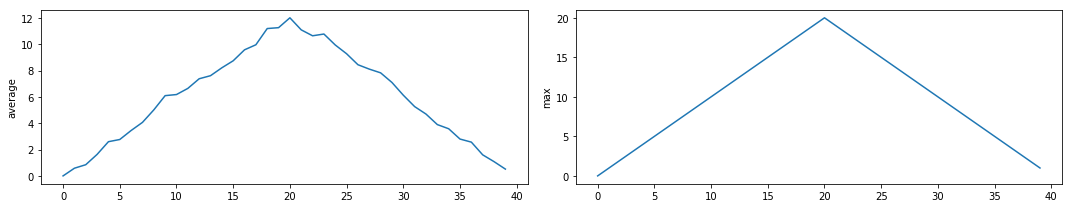

inflammation-05.csv


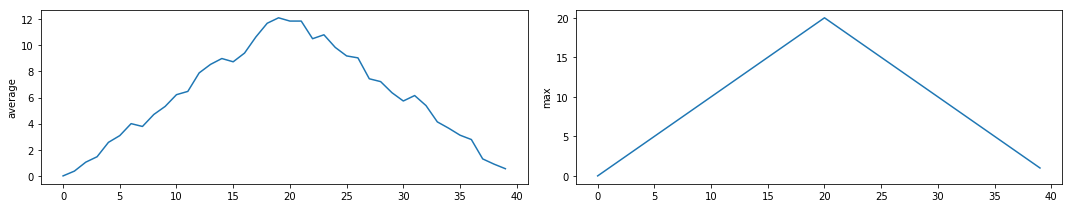

inflammation-04.csv


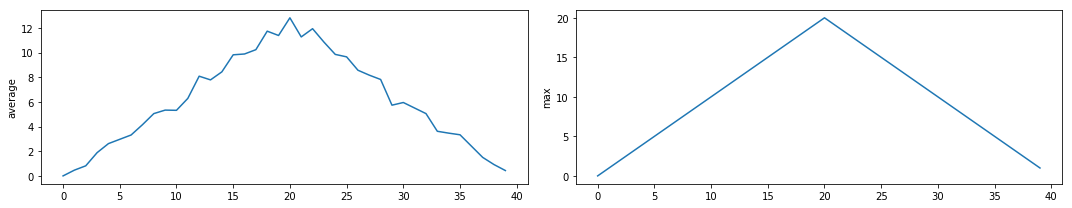

In [69]:
import numpy as np
import matplotlib.pyplot as plt
filenames = glob.glob('*.csv')
filenames = filenames[0:3]
for f in filenames:
    print f
    analyze(f)


Sure enough,
the maxima of these data sets show exactly the same ramp as the first,
and their minima show the same staircase structure.

#### Challenges

1.  Write a function called `analyze_all` that takes a filename pattern as its sole argument
    and runs `analyze` for each file whose name matches the pattern.

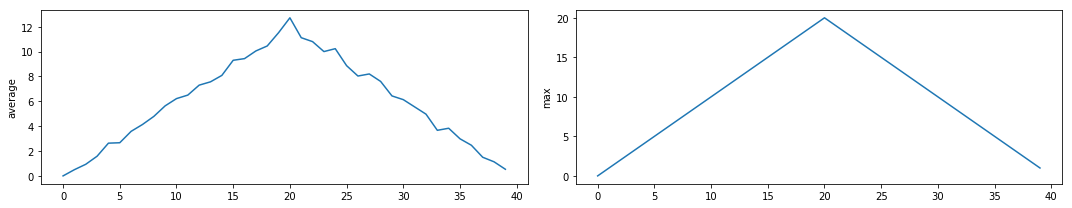

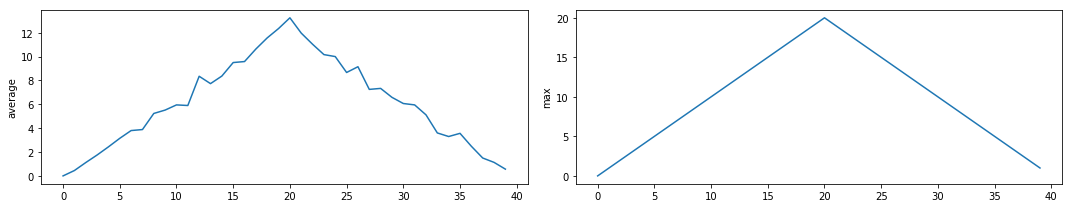

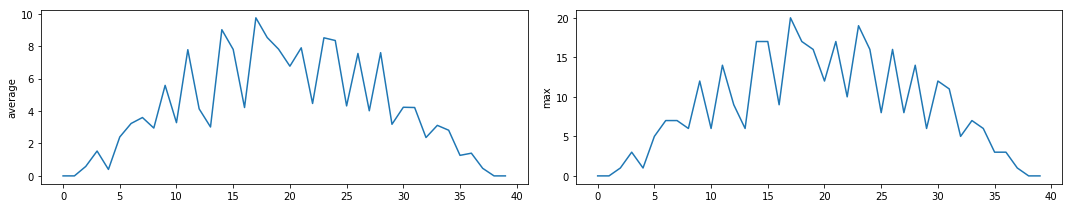

In [73]:
#def analyze_all(filenames,n):
#    tempfiles=filenames[0,n]
#    for f in tempfiles:
#        print f
#        analyze(f)
#    return 0    

def analyze_all(pattern):
    filenames=glob.glob(pattern)
    for f in filenames:
        analyze(f)

analyze_all('inflammation-0[123].csv')
    

#### Key Points

*   Use `for variable in collection` to process the elements of a collection one at a time.
*   The body of a for loop must be indented.
*   Use `len(thing)` to determine the length of something that contains other values.
*   `[value1, value2, value3, ...]` creates a list.
*   Lists are indexed and sliced in the same way as strings and arrays.
*   Lists are mutable (i.e., their values can be changed in place).
*   Strings are immutable (i.e., the characters in them cannot be changed).
*   Use `glob.glob(pattern)` to create a list of files whose names match a pattern.
*   Use `*` in a pattern to match zero or more characters, and `?` to match any single character.

#### Next Steps

We have now solved our original problem:
we can analyze any number of data files with a single command.
More importantly,
we have met two of the most important ideas in programming:

1.  Use functions to make code easier to re-use and easier to understand.
1.  Use lists and arrays to store related values, and loops to repeat operations on them.

We have one more big idea to introduce,
and then we will be able to go back and create a heat map
like the one we initially used to display our first data set.